# Home Assignment No. 1


To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* You have to write **CODE** directly inside specified places marked by comments: **BEGIN/END Solution**. Do not create new cells.

* In some problems you are asked to provide a short discussion of the results. For that find the specific place marked via **Your text answer: \<write your answer\>**.

* For every separate problem or subproblem (if specified) you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task.

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest fixing random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include necessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.


## Task 1 - MNIST, kMNIST component analysis and manifold learning. (4 pts.)

### Task 1.1. (1 pt)

Download `MNIST` dataset. Here we will estimate the data intrinsic dimensionality, decompose the dataset on principle components and estimate the cumulative explained variance by each component.

You can either use the [proposed method](https://www.stat.berkeley.edu/~bickel/mldim.pdf) for the estimation of sample intrinsic dimension or any other method (convenient for you). For the first case, yoyu may use the code from [here](https://gist.github.com/mehdidc/8a0bb21a31c43b0cbbdd31d75929b5e4)

1. Estimate the intrinsic dimensionality of the dataset. Provide the plot.
2. Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with **6** different set of components and corresponding explained variance. You can choose any digit from the dataset.

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

dg = datasets.load_digits()

data = StandardScaler().fit_transform(dg.data)
print(data.shape)

(1797, 64)


1) Estimate the intrinsic dimentionality of the dataset. Provide the plot.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.stats import norm, sem

def mk_hat(X,k):
    neighb = NearestNeighbors(n_neighbors=k+1).fit(X)
    distances, indices_of_heighbours = neighb.kneighbors(X) #shape=(1796,k+1), first neighbor is the point itself
    distances=distances[:,1:] #we remove the point itself from the set of its neighbors
    otv=np.log(distances[:,k-1].reshape(-1, 1)/distances[:, 0:k-1]) #log(T_k/T_j)
    otv=otv.sum(axis=1)/(k-2)
    otv=1.0/otv
    return otv

def mk_hat_k1k2(X,k1,k2):
    otv=[]
    for k in range(k1,k2+1):
        otv.append(mk_hat(X,k))
    return np.array(otv)
    
mk_hat_k1k2(data,k1=10,k2=12).shape

(3, 1797)

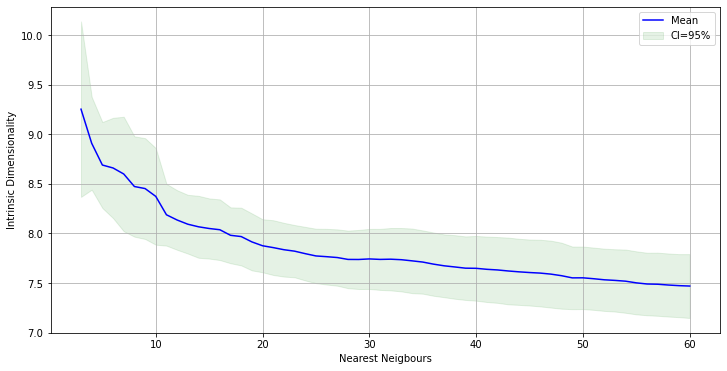

In [3]:
### BEGIN SOLUTION (do not delete this comment!)
k1=3
k2=60
masx = np.arange(k1, k2+1)

plt.figure(figsize=(12, 6))
otv=mk_hat_k1k2(data,k1=k1,k2=k2) #shape=(k2-k1+1,1797)
confidence_intervals = norm.interval(0.95, loc=otv.mean(axis=1), scale=sem(otv, axis=1))

plt.plot(masx, otv.mean(axis=1), 'b', label='Mean') # it is the mean walue
plt.fill_between(masx, confidence_intervals[0], confidence_intervals[1], alpha=0.1,label='CI=95%',color='g')
plt.xlabel("Nearest Neigbours")
plt.ylabel("Intrinsic Dimensionality")
plt.legend()
plt.grid()
plt.show() 

### END SOLUTION (do not delete this comment!)

2) Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with 6 different set of components and corresponding explained variance. You can choose any digit from the dataset.

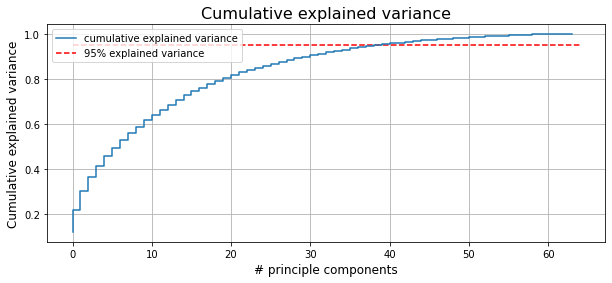

In [5]:
### BEGIN SOLUTION (do not delete this comment!)
from sklearn.decomposition import PCA
pca = PCA().fit(data)

plt.figure(figsize=(10, 4))
plt.step(range(64), np.cumsum(pca.explained_variance_ratio_), label='cumulative explained variance')
plt.hlines(y=0.95, xmin=0, xmax=len(pca.components_), colors='r', linestyles='dashed', label='95% explained variance')
plt.title('Cumulative explained variance', fontsize=16)
plt.xlabel('# principle components', fontsize=12)
plt.ylabel('Cumulative explained variance', fontsize=12)
plt.legend()
plt.grid()
plt.show() 
  
### END SOLUTION (do not delete this comment!)

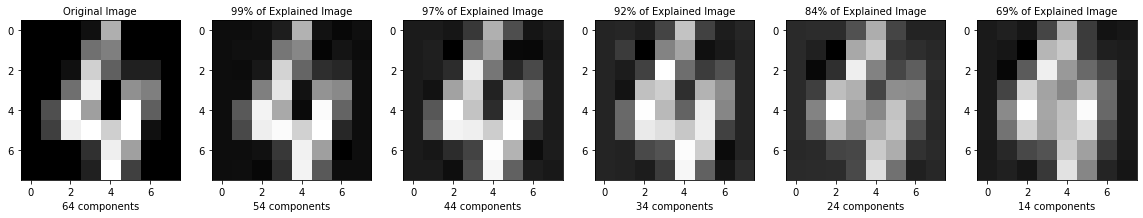

In [7]:
### BEGIN SOLUTION (do not delete this comment!)
def get_subplot_names(nComp):
    if (nComp==64):
        return ('Original Image', '64 components')
    variance_ratio = int(np.round(pca.explained_variance_ratio_.cumsum()[nComp-1]*100))
    return (f'{variance_ratio}% of Explained Image', f'{nComp} components')
    
def get_back_decomposition(x, pca, k):
    return x.mean(axis=0)+np.dot(pca.transform(x)[:,:k],pca.components_[:k,:])

fig,axes=plt.subplots(1,6,figsize=(20, 5))
scaler = StandardScaler().fit(dg.data)
for i in range(6):
    nComp = 64-10*i
    decomposed_all_pictures = get_back_decomposition(data, pca, nComp)
    title, xlabel = get_subplot_names(nComp)
    axes[i].set_title(title, fontsize=10)
    axes[i].set_xlabel(xlabel)
    axes[i].imshow(scaler.inverse_transform(decomposed_all_pictures[4]).reshape(8, 8), cmap='gray')
### END SOLUTION (do not delete this comment!)

### Task 1.2. (1 pt.)

Here we will visualize the decomposition in order to observe how data diverges across different manifold learning methods. We are to compare `PCA`, `ICA` and `Isomap` non-linear decompositions [see more over here https://scikit-learn.org/stable/modules/manifold.html], and check the classification accuracy on the new features. 

1. Calculate new features on the data with ICA, PCA and Isomap. **Choose the number of components according to your estimation of intrinsic dimension**. Calculate the classification accuracy on these features with `LogisticRegression` on `cross_val=5` with $3$ repeats. Use `RepeatedKFold` and fit the `random_seed = 42`.
2. Show that the `Isomap` gives a statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. Justify your results, write down 2-3 sentences.


In [9]:
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap

1) Calculate new features on the data with ICA, PCA and Isomap. Choose the number of components according to your estimation of intrinsic dimention. Calculate the classification accuracy on these features with LogisticRegression on cross_val=5 with  3  repeats. Use RepeatedKFold and fit the random_seed = 42.

In [10]:
### BEGIN SOLUTION (do not delete this comment!)
  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

n_comp = 8
targets = dg.target
scores=[]
for alg in [FastICA, PCA, Isomap]:
    X=alg(n_components=n_comp).fit_transform(data)
    fold=RepeatedKFold(n_splits=5,n_repeats=3,random_state=42)
    model=LogisticRegression()
    tek_scores=cross_val_score(model, X, targets, cv=fold, scoring='accuracy')
    scores.append(tek_scores)
    print("Score for", str(alg).split('.')[-1][:-2],'is', np.mean(tek_scores))

### END SOLUTION (do not delete this comment!)

Score for FastICA is 0.7150943980191891
Score for PCA is 0.8727504384607448
Score for Isomap is 0.9530625193438564


2) Show that the `Isomap` gives statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. 

In [12]:
### BEGIN SOLUTION (do not delete this comment!)
from scipy.stats import ttest_ind
print("p-value for [FastIca > PCA] = ", ttest_ind(scores[0],scores[1],alternative='less').pvalue)
print("p-value for [FastIca > Isomap] = ", ttest_ind(scores[0],scores[2],alternative='less').pvalue)
print("p-value for [PCA > Isomap] = ", ttest_ind(scores[1],scores[2],alternative='less').pvalue)
### END SOLUTION (do not delete this comment!)

p-value for [FastIca > PCA] =  5.600413866372408e-14
p-value for [FastIca > Isomap] =  1.4982673421427805e-19
p-value for [PCA > Isomap] =  1.3644407871139682e-13


3) Justify your results, write down 2-3 senteces.

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)*

Видим, что тесты выдают правильный ответ: смотря на средний скор,  мы видим,  что FastIca<Pca<Isomap, а тест и выдает, что невероятно каждое из событий FastIca>Pca, FastIca>Isomap,Pca>Isomap. В иоге мы делаем вывод, что Isomap дает самый большой скор. 

In [ ]:
### END SOLUTION (do not delete this comment!)*

### Task 1.3. kMNIST dimensionality reduction. (2 pts.)

Explore `KMNIST` dataset https://github.com/rois-codh/kmnist. You are to engineer new features (by using any familiar to you method of Manifold Learning) to increase the classification accuracy. Use the `KNN` classifier with any hyperparameters you like.

1. __(2 pt.)__ Get accuracy on `test_set` more than 93%`. 

**NOTE** that the data is rather heavy, thus your decomposition will take a while.

__Hint:__ Try to use dimensionality reduction methods, which yield better model performance on `MNIST`. These methods can compete with Autoencoders on `torch`. 

1) Get accuracy on test_set more than 93%.

In [15]:
from sklearn.neighbors import KNeighborsClassifier

def load(f):
    return np.load(f)['arr_0']

# Load the data
x_train = load('kmnist-train-imgs.npz')
x_test = load('kmnist-test-imgs.npz')
y_train = load('kmnist-train-labels.npz')
y_test = load('kmnist-test-labels.npz')

# Reshape the data
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [16]:
### BEGIN SOLUTION (do not delete this comment!)

pca_mnist = PCA(n_components=100).fit(x_train)

model = KNeighborsClassifier()
model.fit(pca_mnist.transform(x_train), y_train)
y_pred = model.predict(pca_mnist.transform(x_test))

print('accuracy=',accuracy_score(y_pred,y_test))
### END SOLUTION (do not delete this comment!)

accuracy= 0.9309


## Task 2 - Clustering (2 pts.)

### Task 2.1. Explore KMeans and Gaussian Mixture algorithms (1 pt.)

Try **KMeans, Gaussian Mixture** and **two** more clustering algorithms from sklearn. 
To evaluate clustering performance use **two** clustering metrics: *silhouette score*
and *mutual information* or *adjusted mutual information*.

For each algorithm **your task** is to try to find the parameters leading to the best performance for `n_clusters=true_number_of_clusters`:
1. Apply the algorithm with the true number of clusters and try out at least two **other variants** of the number of clusters: a smaller and a larger one than the true number.;
2. For each number of clusters **visualize the clustering result**, calculate the **clustering metrics** and plot them;

__NOTE:__ `sklearn.model_selection.GridSearchCV` does not support clustering methods, thus you suppose to do it manually.

In [17]:
import numpy as np

True number of clusters is 15


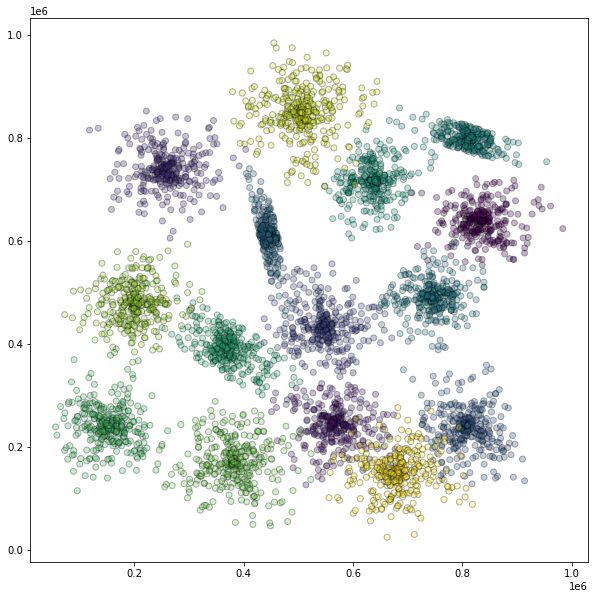

In [18]:
points, labels = np.loadtxt('clustering.txt'), np.loadtxt('clustering_labels.txt')
labels = labels.astype(int)
print("True number of clusters is {}".format(np.max(labels)))
plt.figure(figsize=(10, 10))
plt.scatter(points[:,0], points[:,1], c=labels, alpha=0.3, edgecolor='k')

plt.show()

In [19]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, mutual_info_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import AgglomerativeClustering, SpectralClustering
from tqdm import tqdm

1) For each algorithm your task is to try to find the parameters leading to the best performance for n_clusters=true_number_of_clusters

In [20]:
## BEGIN SOLUTION (do not delete this comment!)
true_number_of_cluster = np.max(labels) #it is 15

grid_kmeans = {
    'n_clusters': [15],
    'n_init': np.arange(10, 60, 10),
    'max_iter': np.arange(100, 500, 100)
}

grid_gaussian_mixture = {
    'n_components': [15],
    'covariance_type': ['full', 'tied', 'diag', 'spherical'],
    'max_iter': np.arange(100, 500, 100)
}

grid_agglomerative_clustering = {
    'n_clusters': [15],
    'linkage': ["complete", "average", "single"],
    'affinity': ["euclidean", "l1", "l2"]
}

grid_spectral_clustering = {
    'n_clusters': [15],
    'n_init': np.arange(10, 50, 10),
    'degree': np.arange(2, 5, 1),
    'affinity': ['nearest_neighbors']
}

dictBestParams=[]
def findBestParams(model, grid):
    best_params=None
    best_sil_score=-np.inf
    best_mut_info_score=-np.inf
    for params in tqdm(ParameterGrid(grid)):
        algo = model(**params)
        prediction = algo.fit_predict(points)
        
        mut_info_score=mutual_info_score(labels_pred=prediction, labels_true=labels)
        sil_score=silhouette_score(points, labels=prediction)
        if (sil_score>best_sil_score):
            best_sil_score=sil_score
            best_mut_info_score=mut_info_score
            best_params=params
    dictBestParams.append(best_params)
    return best_sil_score,best_mut_info_score,best_params

print('KMeans',findBestParams(KMeans,grid_kmeans))
print('GaussianMixture',findBestParams(GaussianMixture,grid_gaussian_mixture))
print('AgglomerativeClustering',findBestParams(AgglomerativeClustering,grid_agglomerative_clustering))
print('SpectralClustering',findBestParams(SpectralClustering,grid_spectral_clustering))

  
### END SOLUTION (do not delete this comment!)

  0%|          | 0/16 [00:00<?, ?it/s]

KMeans (0.6262042513553849, 2.561552088900857, {'max_iter': 100, 'n_clusters': 15, 'n_init': 20})


  0%|          | 0/9 [00:00<?, ?it/s]

GaussianMixture (0.6261804740217701, 2.560733353482937, {'covariance_type': 'tied', 'max_iter': 200, 'n_components': 15})


  0%|          | 0/12 [00:00<?, ?it/s]

AgglomerativeClustering (0.6091772373449134, 2.519454846864759, {'affinity': 'euclidean', 'linkage': 'average', 'n_clusters': 15})


100%|██████████| 12/12 [00:09<00:00,  1.22it/s]

SpectralClustering (0.614423547574505, 2.5478481586525477, {'affinity': 'nearest_neighbors', 'degree': 2, 'n_clusters': 15, 'n_init': 10})


2) Apply the algorithm with the true number of clusters and try out at least two other variants of the number of clusters: a smaller and a larger one than the true number.;

 Do not forget that despite the plot picturing just the KMeans and GuassianMizture, you will need to ADDITIONALLY try put and plot two other clustering methods. 

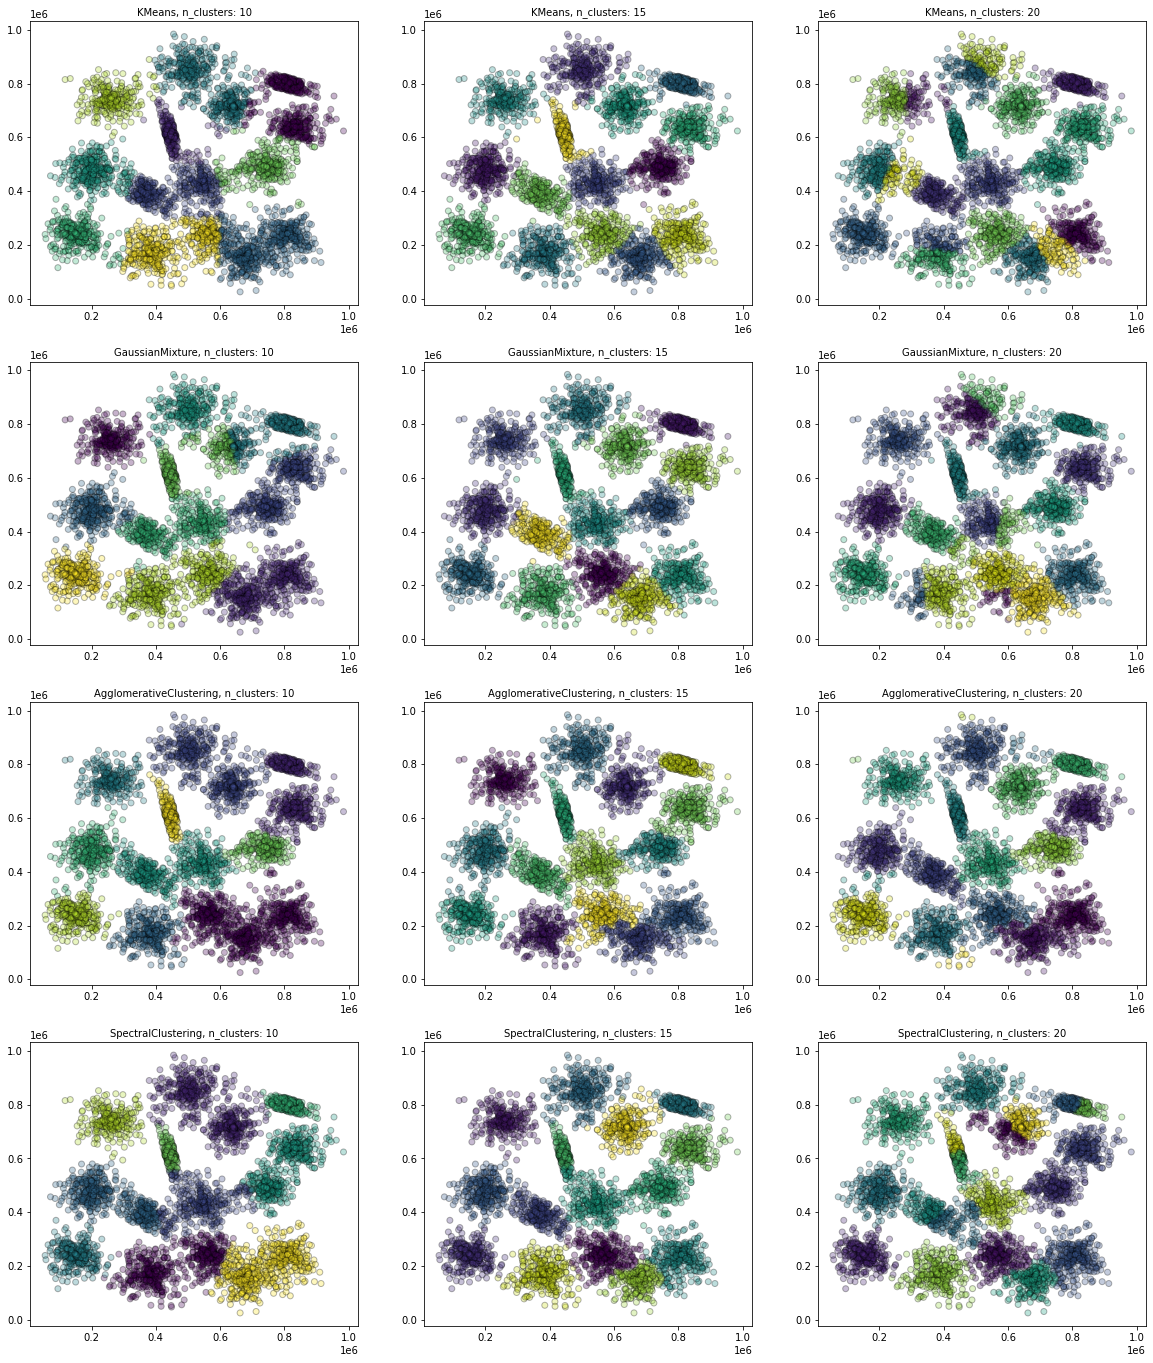

In [23]:
### BEGIN SOLUTION (do not delete this comment!)
clusters_nums = [10, 15, 20]
def get_predictions_different_clusters_all_models(dictBestParams,clusters_nums):
    
    def get_predictions_different_clusters_one_model(model, params, clusters_nums):
        otv=[]
        for cluster_num in clusters_nums:
            algo = model(**params)
            if (model==GaussianMixture):
                algo.set_params(**{'n_components': cluster_num})
            else:
                algo.set_params(**{'n_clusters': cluster_num})
            otv.append(algo.fit_predict(points))
        return np.array(otv)

    predictions = []
    for params,model in zip(dictBestParams,[KMeans,GaussianMixture,AgglomerativeClustering,SpectralClustering]):
        predictions.append(get_predictions_different_clusters_one_model(model, params, clusters_nums))
        
    return np.array(predictions)

predictions=get_predictions_different_clusters_all_models(dictBestParams,clusters_nums)

fig, axes = plt.subplots(nrows=4, ncols=len(clusters_nums), figsize=(20, 24))
for i,(model_name,one_model_predictions) in enumerate(zip([KMeans,GaussianMixture,AgglomerativeClustering,SpectralClustering],predictions)):
    for j,(clusters_num, prediction) in enumerate(zip(clusters_nums, one_model_predictions)):
        axes[i][j].set_title(f'{model_name.__name__}, n_clusters: {clusters_num}', fontsize=10)
        axes[i][j].scatter(points[:,0], points[:,1], c=prediction, alpha=0.3, edgecolor='k')
        
plt.show()
### END SOLUTION (do not delete this comment!)

3) For each number of clusters vizualize the clustering result, calculate the clustering metrics and plot them;


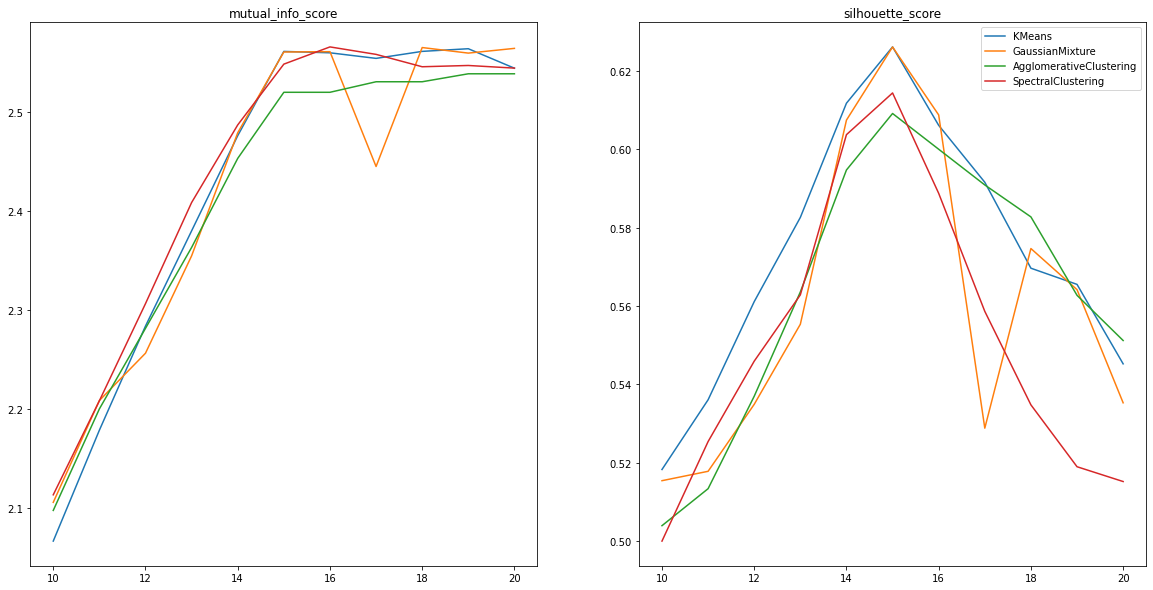

In [24]:
### BEGIN SOLUTION (do not delete this comment!)
clusters_nums=range(10,21)
predictions=get_predictions_different_clusters_all_models(dictBestParams,clusters_nums)

fig, axes = plt.subplots(1,2,figsize=(20, 10))

axes[0].set_title('mutual_info_score')
axes[1].set_title('silhouette_score')

for model_name,model_predictions in zip([KMeans,GaussianMixture,AgglomerativeClustering,SpectralClustering],predictions):
    
    model_mutual_scores=[mutual_info_score(labels_pred=pred,labels_true=labels) for pred in model_predictions]
    model_sil_scores=[silhouette_score(points,labels=pred) for pred in model_predictions]
    axes[0].plot(clusters_nums,model_mutual_scores,label=f'{model_name.__name__}')
    axes[1].plot(clusters_nums,model_sil_scores, label=f'{model_name.__name__}')

plt.legend()
plt.show()
  
### END SOLUTION (do not delete this comment!)

### Task 2.2. Finding the Number of Clusters with Bootstrap. (1 pt.)
For a chosen algorithm find the best number of clusters using bootstrap. Based on your observations made at the previous task, choose one algorithm assuming **you do not have true labels and do not know the true number of clusters**.
1. Estimate variance of the clustering metric of your choice (i.e. *silhouette score*/*mutual information*/*adjusted mutual information*)and construct normal 95% **confidence interval (CI)**;
2. **Plot the metric** with the corresponding confidence intervals and show the best number of clusters.

__Hints:__ 
- you can choose bootstrap samples with any size, and sample number starting from `50`;
- you can use `scipy.stats.norm.interval()` to derive CI;

1) Estimate variance of the clustering metric of your choice (i.e. silhouette score/mutual information/adjusted mutual information)and construct normal 95% confidence interval (CI);

100%|██████████| 50/50 [00:21<00:00,  2.30it/s]


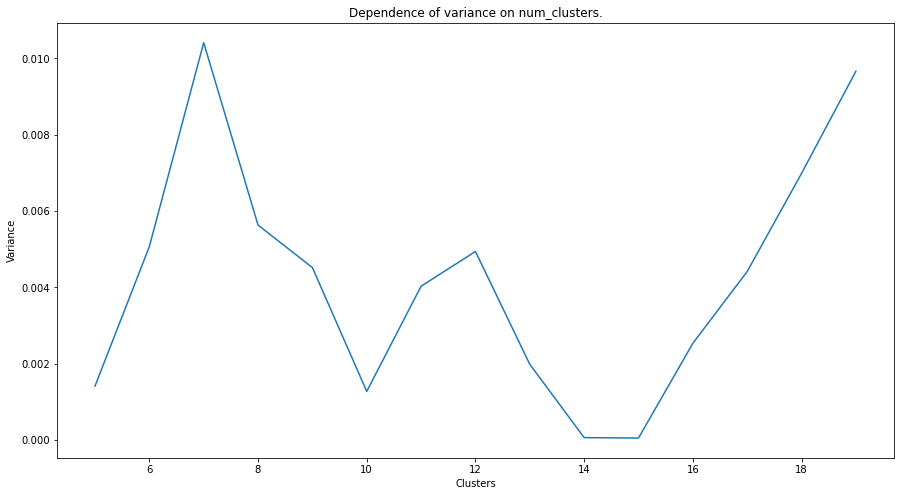

In [25]:
### BEGIN SOLUTION (do not delete this comment!)

mutual_scores=[]
sil_scores=[]
for num_clast in range(5,20):
    mutual_scores_fixed_cluster=[]
    sil_scores_fixed_cluster=[]
    for i_sample in tqdm(range(50)):
        model=KMeans(n_clusters=num_clast)
        pred=model.fit_predict(points)
        mutual_scores_fixed_cluster.append(mutual_info_score(labels_pred=pred,labels_true=labels))
        sil_scores_fixed_cluster.append(silhouette_score(points,labels=pred))
    mutual_scores.append(mutual_scores_fixed_cluster)
    sil_scores.append(sil_scores_fixed_cluster)

sil_scores=np.array(sil_scores)
mutual_scores=np.array(mutual_scores)

plt.figure(figsize=(15, 8))
plt.title("Dependence of variance on num_clusters.")
plt.ylabel("Variance")
plt.xlabel("Clusters")
plt.plot(range(5, 20), sil_scores.std(axis=1))
plt.show()
  
### END SOLUTION (do not delete this comment!)

2) Plot the metric with the corresponding confidence intervals and show the best number of clusters.

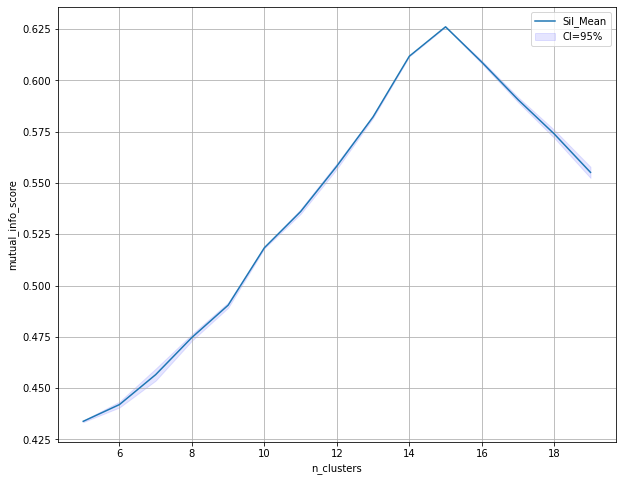

In [27]:
### BEGIN SOLUTION (do not delete this comment!)

sil_confidence_intervals = norm.interval(0.95, loc=sil_scores.mean(axis=1), scale=sem(sil_scores, axis=1))

fig,ax = plt.subplots(figsize=(10, 8))
ax.plot(range(5,20),sil_scores.mean(axis=1),label='Sil_Mean')
ax.fill_between(range(5, 20),sil_confidence_intervals[0],sil_confidence_intervals[1],color='b',alpha=.1, label='CI=95%')
plt.xlabel('n_clusters')
plt.ylabel('mutual_info_score')
ax.legend()
ax.grid()
plt.show()
  
### END SOLUTION (do not delete this comment!)

Видим, что лучшее количество кластеров - это 15.

## Task 3. Practice with Different Anomaly Detection Algorithms. (2 pts)

### Task 3.1 (1 pt)

- Here we will use __fraud_dataset__ (creditcard.csv )
- Compute the __contamination__ (or impurity) on the **test** set as the ratio of anomaly objects to all the objects.  
- Predict the anomaly with any **three** Anomaly detection methods among ones from: https://scikit-learn.org/stable/modules/outlier_detection.html, note, we do not use true labels to fit anomaly detectors.
- Explore, how the `roc_auc_score` for anomaly detectors changes with `contamination` value, taking a grid `[0.1*contamination, 1*contamination, 10*contamination]`. Point out the best performing algorithm.

In [28]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score

data = pd.read_csv('./creditcard.csv')

X = data.drop(columns="Class")
y = data["Class"]

# keep the split fixed
tt_split = train_test_split(X, y, test_size = 0.1, stratify=y, random_state= 42)
train_X, test_X, train_y, test_y = tt_split 

# delete the targets for training
train_y = 0

In [29]:
### BEGIN SOLUTION (do not delete this comment!)
  
# impurity estimation on test data

contamination = test_y.mean() # >>> your solution here <<<

### END SOLUTION (do not delete this comment!)

In [30]:
### BEGIN SOLUTION (do not delete this comment!)

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope


for i in [0.1, 1, 10]:
    for model_name in [IsolationForest, LocalOutlierFactor, EllipticEnvelope]:
        model=model_name(contamination=contamination*i)
        if model_name==LocalOutlierFactor:
            model=model_name(contamination=contamination*i,novelty=True)
        pred=model.fit(train_X).predict(test_X)
        #print(model.__name__)
     
        print(model_name.__name__,'Contamination: ', np.round(contamination * i, 3), ' ', 
          'ROC/AUC: ', np.round(roc_auc_score(test_y, pred), 3),
          'Precision: ', np.round(precision_score(test_y, pred, average = 'micro'), 3))
    
### END SOLUTION (do not delete this comment!)

IsolationForest Contamination:  0.002   ROC/AUC:  0.48 Precision:  0.016
LocalOutlierFactor Contamination:  0.002   ROC/AUC:  0.501 Precision:  0.017
EllipticEnvelope Contamination:  0.002   ROC/AUC:  0.501 Precision:  0.017
IsolationForest Contamination:  0.017   ROC/AUC:  0.238 Precision:  0.008
LocalOutlierFactor Contamination:  0.017   ROC/AUC:  0.5 Precision:  0.017
EllipticEnvelope Contamination:  0.017   ROC/AUC:  0.34 Precision:  0.011
IsolationForest Contamination:  0.169   ROC/AUC:  0.168 Precision:  0.003
LocalOutlierFactor Contamination:  0.169   ROC/AUC:  0.494 Precision:  0.014
EllipticEnvelope Contamination:  0.169   ROC/AUC:  0.222 Precision:  0.005


### Task 3.2 (1 pt)

The idea is to see when anomaly detection methods, trained with no labels, can facilitate the prediction of the classifier. Imagine a real case scenario: you have labelled only a small portion of the dataset and a bunch of unlabeled data. We will simulate the situation when __90%__ of data is unlabeled and we still desire to achieve good performance. 


As you can score your predictions only on the __10%__ of the sample, you better do it in cross validation to ensure the model stability.
1. Take your favorite classifier and estimate the performance on __test set__ using `StratifiedKFold(n_splits=10, random_state = 42)` with `roc_auc` and `precision_score`. You can use test set upsampling and other instruments to enforce your prediction. 

> Do not get confused, here we swap __train__ and __test__ and use __test__ as if it's the only data we have on our hands.

2. Try to enhance the classifier performance in  `roc_auc` or `precision_score` (or ideally both), building the ensemble, using __Anomaly detection__ methods from the previous task. You can fit __Anomaly detection__ methods on both  __training set__ and subset from __test set__ on the cross-validation fold. Write 1-2 sentences on your findings.

__NOTE:__ try not to overfit, thus not adjust the `contamination` while training, and refit classifiers on each fold. 

__Hints:__ `sklearn.ensemble.VotingClassifier` does not support Anomaly detection methods, so you are to write it yourself. And `np.logical_and` or `np.logical_or` will suit for the trivial ensemble.

In [31]:
### BEGIN SOLUTION (do not delete this comment!)

# your favorite classifier

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, random_state = 42)
skf.get_n_splits(test_X, test_y)

roc_auc_scores = []
pr_scores = []

for train_index, test_index in skf.split(test_X,test_y):
    model=LogisticRegression() 
    model.fit(test_X.iloc[train_index], test_y.iloc[train_index])
    labels = model.predict(test_X.iloc[test_index])
    roc_auc_scores.append(roc_auc_score(test_y.iloc[test_index], labels))
    pr_scores.append(precision_score(test_y.iloc[test_index], labels, average='micro'))
    
### END SOLUTION (do not delete this comment!)

print('ROC/AUC mean: ', np.mean(roc_auc_scores), 'std: ', np.std(roc_auc_scores))    
print('Precision mean: ', np.mean(pr_scores), 'std: ', np.std(pr_scores))

ROC/AUC mean:  0.8760934025203854 std:  0.10705471407722587
Precision mean:  0.9930891301753968 std:  0.004369330748042021


In [32]:
### BEGIN SOLUTION (do not delete this comment!)

# ensemble of classifiers
skf = StratifiedKFold(n_splits=10, random_state = 42)
skf.get_n_splits(test_X, test_y)

roc_auc_scores = []
pr_scores = []

for train_index, test_index in skf.split(test_X, test_y):
    clf1=LogisticRegression().fit(test_X.iloc[train_index], test_y.iloc[train_index])
    contamination=test_y.iloc[test_index].mean()
    pred1=clf1.predict(test_X.iloc[test_index])
    
    clf2=IsolationForest(contamination=contamination).fit(np.array(test_X))
    pred2=(1-clf2.predict(np.array(test_X.iloc[test_index])))/2
    otv=np.logical_or(pred1, pred2)
    roc_auc_scores.append(roc_auc_score(test_y.iloc[test_index], otv))
    pr_scores.append(precision_score(test_y.iloc[test_index], otv, average = 'micro')) 
    
### END SOLUTION (do not delete this comment!)
    
print('ROC/AUC mean: ', np.mean(roc_auc_scores), 'std: ', np.std(roc_auc_scores))    
print('Precision mean: ', np.mean(pr_scores), 'std: ', np.std(pr_scores))

ROC/AUC mean:  0.884728193723746 std:  0.11437566218164705
Precision mean:  0.9858346259396253 std:  0.007143776810965131


Видим, что roc_auc немного увеличился, но зато precision немного упал.